# Exploring Restaurant Data

### **WHY GEOSPATIAL ANALYSIS?**  
Geospatial analysis is crucial when dealing with location-based data. It helps uncover spatial relationships and patterns that can be used for making informed decisions in various fields, from urban planning to business intelligence. By analyzing geographic data, we can gain insights into regional trends, customer behavior, and optimal resource allocation.

In this project, we will apply geospatial analysis to explore the restaurant data in Bengaluru. This type of analysis will allow us to:

- Understand the geographic distribution of restaurants
- Identify popular restaurant types and neighborhoods
- Investigate trends in restaurant ratings, pricing, and amenities
- Explore correlations between restaurant locations and their attributes

**OBJECTIVE OF THIS NOTEBOOK**  
This notebook focuses on geospatial analysis of restaurant data collected from Zomato, specifically for Bengaluru. We will analyze various aspects such as location, ratings, costs, and type of cuisine offered by restaurants across different neighborhoods.

By the end of this project, you will gain insights into:
- How to work with location-based datasets
- Techniques for visualizing and analyzing geospatial data
- How to identify patterns and trends in a city's restaurant scene
- The relationship between restaurant attributes (e.g., rating, cost) and their locations

**CONTENT OF THIS NOTEBOOK**  
In this notebook, we will explore a dataset containing information about various restaurants in Bengaluru, including:
- Restaurant name, address, and contact details
- Ratings, number of reviews, and type of meals offered
- Neighborhoods, cost estimates, and available services (e.g., online orders, table bookings)

We will utilize Python libraries to clean the data, perform exploratory analysis, and visualize the spatial distribution of restaurants in Bengaluru. Additionally, we will focus on understanding customer preferences, such as the most liked dishes and common cuisines across different locations.

**BUSINESS CASE**  
Imagine you work as a data analyst for a restaurant chain looking to expand in Bengaluru. The company is interested in knowing the optimal locations for opening new branches. Your task is to analyze the existing restaurant landscape to identify high-traffic areas with high customer ratings and preferences. The company also wants to understand what types of cuisines and restaurant styles are more likely to succeed in certain neighborhoods.

You should answer questions like:
- Where are the most popular restaurant types located in Bengaluru?
- Which areas have the highest concentration of highly-rated restaurants?
- How do restaurant ratings correlate with location and amenities?
- Is there a particular area that stands out for specific types of cuisine?

By addressing these questions, you will provide valuable insights for strategic expansion and decision-making.

## Let's get started

Set-up your working environment

In [4]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
import plotly.express as px
from nltk import FreqDist, bigrams, trigrams
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium import Map



In [5]:
con = sqlite3.connect(r"..\zomato_rawdata.sqlite")

In [6]:
pd.read_sql_query("SELECT * FROM Users", con).head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [8]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.isnull().sum()/len(df) * 100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df.rate.replace(('NEW', '-'), np.nan , inplace= True)

C:\Users\palab\AppData\Local\Temp\ipykernel_9212\3439054888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.rate.replace(('NEW', '-'), np.nan , inplace= True)


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
"4.1/5".split('/')[0]

'4.1'

In [14]:
float(("4.1/5").split('/')[0])

4.1

In [15]:
df.rate = df.rate.apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)

In [16]:
x = pd.crosstab(df.rate, df.online_order)
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

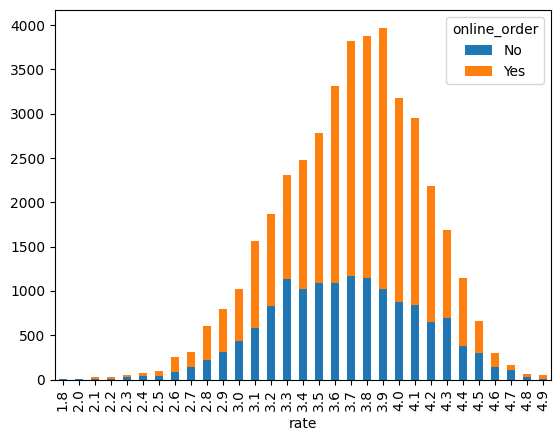

In [17]:
x.plot(kind= 'bar', stacked= True)

In [18]:
norm_x = x.div(x.sum(axis = 1).astype(float), axis = 0)*100

<Axes: xlabel='rate'>

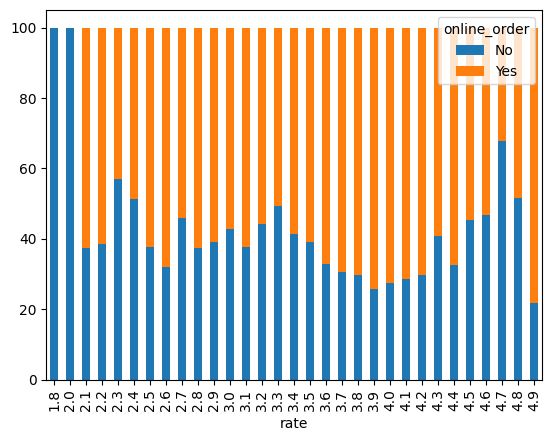

In [19]:
norm_x.plot(kind= 'bar' , stacked= True)

## DATA CLEANING

In [20]:
df.rest_type.isnull().sum()

np.int64(227)

In [21]:
data = df.dropna(subset= ['rest_type'])

In [22]:
data['rest_type'].isnull().sum()

np.int64(0)

In [23]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [24]:
qb_df = data[data.rest_type.str.contains('Quick Bites')]
qb_df.shape

(20639, 18)

In [25]:
qb_df.reviews_list = qb_df.reviews_list.apply(lambda y: y.lower())

C:\Users\palab\AppData\Local\Temp\ipykernel_9212\1836613656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_df.reviews_list = qb_df.reviews_list.apply(lambda y: y.lower())


In [26]:
tkn = RegexpTokenizer("[a-zA-Z]+")

In [27]:
tkn

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [28]:
tkn.tokenize(qb_df.reviews_list[3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [29]:
sample = data[0:10000]

In [30]:
r_tkn = sample.reviews_list.apply(tkn.tokenize)

In [31]:
r_tkn1 = data.reviews_list.apply(tkn.tokenize)

## UNIGRAM ANALYSIS

In [32]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
stop.extend(['rated', 'Rated', 'nan' , 'RATED', 'x', 'n'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
r3 = r_tkn[3]

In [35]:
print(r3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [36]:
print([token for token in r3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [37]:
r_tkn_clean1 = r_tkn.apply(lambda each_review : [token for token in each_review if token not in stop])

In [38]:
r_tkn_clean1

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [39]:
type(r_tkn_clean1)

pandas.core.series.Series

In [40]:
t_r_2D = list(r_tkn_clean1)

In [41]:
t_r_1D = []

for r in t_r_2D:
    for word in r:
        t_r_1D.append(word)

In [42]:
t_r_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [43]:
fd = FreqDist()

In [44]:
for word in t_r_1D:
    fd[word] = fd[word] + 1

In [45]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

<Axes: xlabel='Samples', ylabel='Counts'>

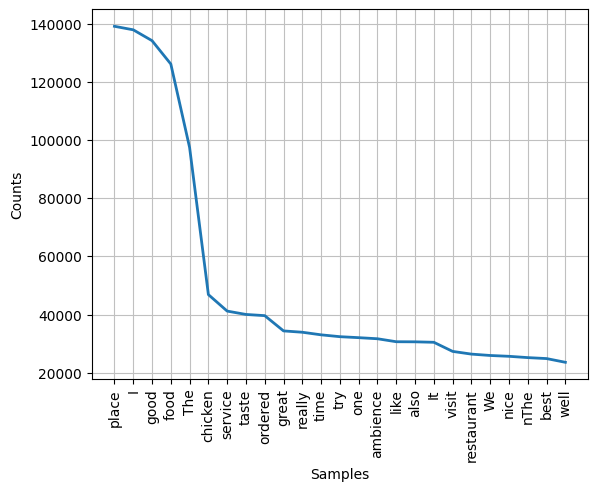

In [46]:
fd.plot(25)

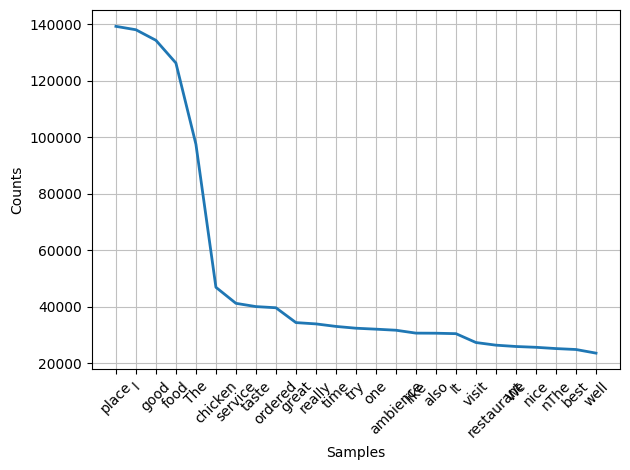

In [47]:
fd.plot(25)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [48]:
m_c = fd.most_common(25)
df1 = pd.DataFrame(m_c, columns=["word", "count"])

In [49]:
fig = px.line(df1, x="word", y="count", markers=True, title="Top 25 Most Common Words")
fig.update_traces(mode="lines+markers")  # Show both lines and markers
fig.update_layout(
    xaxis_title="Word",
    yaxis_title="Frequency",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    title_x=0.5  # Center the title
)
fig.show()


## Bi-gram & Trigram Analysis on Data

In [50]:
bg = bigrams(t_r_1D)

In [51]:
fd_bg = FreqDist()

for b in bg:
    fd_bg[b] = fd_bg[b] + 1

In [52]:
fd_bg.most_common(25)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658)]

In [53]:
fd_bg.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

In [54]:
tg = trigrams(t_r_1D)

In [55]:
fd_tg = FreqDist()

for t in tg:
    fd_tg[t] = fd_bg[t] + 1

In [56]:
fd_tg.most_common(50)

[(('A', 'beautiful', 'place'), 1),
 (('beautiful', 'place', 'dine'), 1),
 (('place', 'dine', 'The'), 1),
 (('dine', 'The', 'interiors'), 1),
 (('The', 'interiors', 'take'), 1),
 (('interiors', 'take', 'back'), 1),
 (('take', 'back', 'Mughal'), 1),
 (('back', 'Mughal', 'era'), 1),
 (('Mughal', 'era', 'The'), 1),
 (('era', 'The', 'lightings'), 1),
 (('The', 'lightings', 'perfect'), 1),
 (('lightings', 'perfect', 'We'), 1),
 (('perfect', 'We', 'went'), 1),
 (('We', 'went', 'occasion'), 1),
 (('went', 'occasion', 'Christmas'), 1),
 (('occasion', 'Christmas', 'limited'), 1),
 (('Christmas', 'limited', 'items'), 1),
 (('limited', 'items', 'available'), 1),
 (('items', 'available', 'But'), 1),
 (('available', 'But', 'taste'), 1),
 (('But', 'taste', 'service'), 1),
 (('taste', 'service', 'compromised'), 1),
 (('service', 'compromised', 'The'), 1),
 (('compromised', 'The', 'complaint'), 1),
 (('The', 'complaint', 'breads'), 1),
 (('complaint', 'breads', 'could'), 1),
 (('breads', 'could', 'bett

## Extracting Geographical-coordinates

In [57]:
df.location

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [58]:
len(df.location.unique())

94

In [59]:
df.location = df.location + ", Bangalore, Karnataka, India"

In [60]:
df.location.unique()

array(['Banashankari, Bangalore, Karnataka, India',
       'Basavanagudi, Bangalore, Karnataka, India',
       'Mysore Road, Bangalore, Karnataka, India',
       'Jayanagar, Bangalore, Karnataka, India',
       'Kumaraswamy Layout, Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar, Bangalore, Karnataka, India',
       'Vijay Nagar, Bangalore, Karnataka, India',
       'Uttarahalli, Bangalore, Karnataka, India',
       'JP Nagar, Bangalore, Karnataka, India',
       'South Bangalore, Bangalore, Karnataka, India',
       'City Market, Bangalore, Karnataka, India',
       'Nagarbhavi, Bangalore, Karnataka, India',
       'Bannerghatta Road, Bangalore, Karnataka, India',
       'BTM, Bangalore, Karnataka, India',
       'Kanakapura Road, Bangalore, Karnataka, India',
       'Bommanahalli, Bangalore, Karnataka, India', nan,
       'CV Raman Nagar, Bangalore, Karnataka, India',
       'Electronic City, Bangalore, Karnataka, India',
       'HSR, Bangalore, Karnataka, India',
       '

In [61]:
df_c = df.copy()

In [62]:
df_c.location

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [63]:
df_c.location.isnull().sum()

np.int64(21)

In [64]:
df_c = df_c.dropna(subset=['location'])

In [65]:
ldf = pd.DataFrame(df_c.location.unique())

In [66]:
ldf

,0
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [67]:
ldf.columns = ['name']

In [68]:
geolocator = Nominatim(user_agent="app", timeout = None)

In [69]:
lat = []
lon = []

for location in ldf['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)


In [70]:
ldf['Latitude'] = lat
ldf['Longitude'] = lon

In [71]:
ldf

,name,Latitude,Longitude
0,"Banashankari, Bangalore, Karnataka, India",12.939333,77.553982
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.956754,77.549375
3,"Jayanagar, Bangalore, Karnataka, India",12.939904,77.582638
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009652,77.553054
89,"Magadi Road, Bangalore, Karnataka, India",12.975653,77.555355
90,"Yelahanka, Bangalore, Karnataka, India",13.107915,77.585524
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


## Geographical Analysis

In [72]:
ldf.isnull().sum()

name         0
Latitude     2
Longitude    2
dtype: int64

In [73]:
ldf[ldf['Latitude'].isna()]

,name,Latitude,Longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [74]:
row_46 = ldf.iloc[45] 
print(row_46)

name         St. Marks Road, Bangalore, Karnataka, India
Latitude                                       12.975801
Longitude                                      77.601692
Name: 45, dtype: object


In [75]:
ldf['Latitude'] [79] = 13.0163
ldf['Longitude'] [79] = 77.6785

C:\Users\palab\AppData\Local\Temp\ipykernel_9212\237769718.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\palab\AppData\Local\Temp\ipykernel_9212\237769718.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy o

In [76]:
ldf['Latitude'] [85] = 13.0068
ldf['Longitude'] [85] = 77.5813

C:\Users\palab\AppData\Local\Temp\ipykernel_9212\536469150.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\palab\AppData\Local\Temp\ipykernel_9212\536469150.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy o

## Geographical Heat maps

In [77]:
df.cuisines.isnull().sum()

np.int64(45)

In [80]:
df = df.dropna(subset=['cuisines'])

In [81]:
n_in = df[df.cuisines.str.contains('North Indian')]

In [82]:
n_in.shape

(21085, 18)

In [83]:
n_in_r = n_in.location.value_counts().reset_index().rename(columns = {'location': 'name', "count": "count"})

In [84]:
n_in_r

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [85]:
heatmap_n = n_in_r.merge(ldf, on='name', how= 'left')
heatmap_n

,name,count,Latitude,Longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.916360,77.604733
1,"HSR, Bangalore, Karnataka, India",1123,12.900563,77.649475
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973393,77.611247
88,"West Bangalore, Bangalore, Karnataka, India",1,13.009652,77.553054


In [86]:
basemap = folium.Map()
basemap1 = folium.Map()

In [87]:
HeatMap(heatmap_n[['Latitude', 'Longitude', "count"]]).add_to(basemap1)

In [88]:
basemap1

In [89]:
s_in = df[df.cuisines.str.contains('South Indian')]

In [90]:
s_in.shape

(8644, 18)

In [91]:
s_in.location.value_counts()

location
BTM, Bangalore, Karnataka, India                815
JP Nagar, Bangalore, Karnataka, India           437
HSR, Bangalore, Karnataka, India                436
Jayanagar, Bangalore, Karnataka, India          416
Whitefield, Bangalore, Karnataka, India         308
                                               ... 
Jakkur, Bangalore, Karnataka, India               3
Old Madras Road, Bangalore, Karnataka, India      2
North Bangalore, Bangalore, Karnataka, India      1
South Bangalore, Bangalore, Karnataka, India      1
Hebbal, Bangalore, Karnataka, India               1
Name: count, Length: 86, dtype: int64

In [92]:
s_in_r = s_in.location.value_counts().reset_index().rename(columns = {'location': 'name', "count": "count"})
s_in_r

,name,count
0,"BTM, Bangalore, Karnataka, India",815
1,"JP Nagar, Bangalore, Karnataka, India",437
2,"HSR, Bangalore, Karnataka, India",436
3,"Jayanagar, Bangalore, Karnataka, India",416
4,"Whitefield, Bangalore, Karnataka, India",308
...,...,...
81,"Jakkur, Bangalore, Karnataka, India",3
82,"Old Madras Road, Bangalore, Karnataka, India",2
83,"North Bangalore, Bangalore, Karnataka, India",1
84,"South Bangalore, Bangalore, Karnataka, India",1


In [93]:
heatmap_s = s_in_r.merge(ldf, on='name', how= 'left')
heatmap_s

,name,count,Latitude,Longitude
0,"BTM, Bangalore, Karnataka, India",815,12.916360,77.604733
1,"JP Nagar, Bangalore, Karnataka, India",437,12.909694,77.586607
2,"HSR, Bangalore, Karnataka, India",436,12.900563,77.649475
3,"Jayanagar, Bangalore, Karnataka, India",416,12.939904,77.582638
4,"Whitefield, Bangalore, Karnataka, India",308,12.969637,77.749745
...,...,...,...,...
81,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
82,"Old Madras Road, Bangalore, Karnataka, India",2,12.985712,77.645081
83,"North Bangalore, Bangalore, Karnataka, India",1,13.043932,77.625427
84,"South Bangalore, Bangalore, Karnataka, India",1,12.864107,77.554416


In [94]:
HeatMap(heatmap_s[['Latitude', 'Longitude', "count"]]).add_to(basemap)

In [95]:
basemap

 ## Automate Data Analysis

In [96]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    c_res_c = cuisine_df.location.value_counts().reset_index().rename(columns = {'location': 'name', "count": "count"})
    heatmap_c = c_res_c.merge(ldf, on='name', how= 'left')
    print(heatmap_c.head(4))

    basemap2 = folium.Map()
    HeatMap(heatmap_c[['Latitude', 'Longitude', "count"]]).add_to(basemap2)
    return basemap2

In [97]:
get_heatmap('Chinese')

                                                name  count   Latitude  \
0                   BTM, Bangalore, Karnataka, India   1824  12.916360   
1                   HSR, Bangalore, Karnataka, India    760  12.900563   
2  Koramangala 5th Block, Bangalore, Karnataka, I...    730  12.934843   
3          Marathahalli, Bangalore, Karnataka, India    668  12.955257   

   Longitude  
0  77.604733  
1  77.649475  
2  77.618977  
3  77.698416  
